# Binary Classification to Detect whether a Mushroom is Poisonous

### ~Arnav Modi

The following program has been created to look at data (which is in a csv format) and based on that make predictions as to whether a mushroom is poisonous or not. The dataset has been taken from kaggle. This is the link for the dataset: [Mushroom Classification | Kaggle (safe to eat or deadly poison)](http://https://www.kaggle.com/uciml/mushroom-classification). The following are the main components of this program:

* Importing the required libraries
* Gettintg the directory of the data (CSV file)
* About the data
* Converting the data from a CSV format to a Pandas DataFrame
* Visualising some features of the data using a graph
* Converting categorial values into dummy variables
* Splitting the data into X and y
* Converting the Pandas DataFrame into a numpy array
* Checking if X and y have the appropriate dimensions
* Splitting X and y into X_train, X_test, y_train, y_test
* Checking the dimensions of X_train, y_train, X_test, y_test
* Creating a Sequential model
* Viewing the model's summary
* Visualising the layers in the model
* Compiling the model
* Adding EarlyStopping
* Visualising loss and binary accuracy

# Importing the required Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import SVG
from tensorflow.keras.utils import plot_model, model_to_dot

print("All the modules have been imported...")

All the modules have been imported...


# Getting the directory of the data (CSV file)

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mushroom-classification/mushrooms.csv


# About the data

* **Attribute Information:** (classes: edible=e, poisonous=p)

* **cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* **cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

* **cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* **bruises:** bruises=t,no=f

* **odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* **gill-attachment:** attached=a,descending=d,free=f,notched=n

* **gill-spacing:** close=c,crowded=w,distant=d

* **gill-size:** broad=b,narrow=n

* **gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* **stalk-shape:** enlarging=e,tapering=t

* **stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* **stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

* **stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

* **stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* **stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* **veil-type:** partial=p,universal=u

* **veil-color:** brown=n,orange=o,white=w,yellow=y

* **ring-number:** none=n,one=o,two=t

* **ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* **spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* **population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* **habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Converting the data from a CSV format to a Pandas dataframe

In [3]:
data_dir = "/kaggle/input/mushroom-classification/mushrooms.csv"
mushroom_data = pd.read_csv(data_dir)

In [4]:
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Visualising some features of the data using graphs

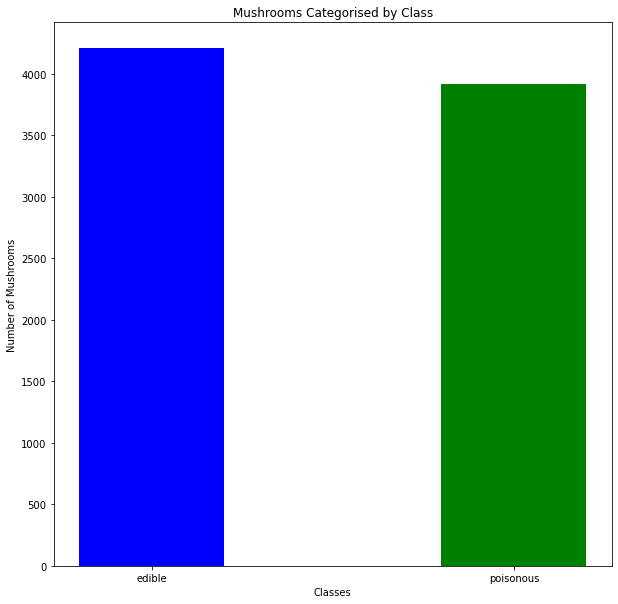

In [5]:
edible_count, poisonous_count = mushroom_data['class'].value_counts()

fig = plt.figure(figsize = (10, 10)) 
  
plt.bar(["edible", "poisonous"], [edible_count, poisonous_count], color = ["blue", "green"], width = 0.4) 
  
plt.xlabel("Classes") 
plt.ylabel("Number of Mushrooms") 
plt.title("Mushrooms Categorised by Class") 
plt.show()

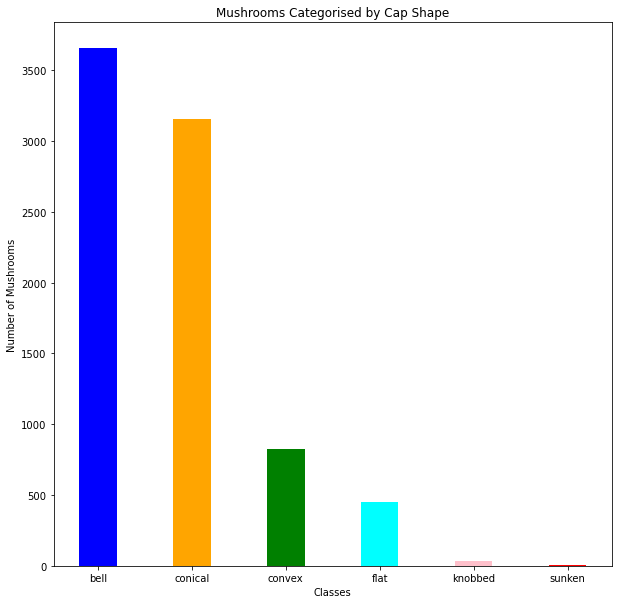

In [6]:
cap_shape = mushroom_data['cap-shape'].value_counts()

fig = plt.figure(figsize = (10, 10)) 
  
plt.bar(["bell", "conical","convex","flat", "knobbed","sunken"], cap_shape, color = ["blue", "orange","green", "cyan", "pink", "red"], width = 0.4) 
  
plt.xlabel("Classes") 
plt.ylabel("Number of Mushrooms") 
plt.title("Mushrooms Categorised by Cap Shape") 
plt.show()

# Converting categorical values into dummy variables

### Example:

In the original dataset, there was a column called cap-shape **(bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s)**. After applying the get_dummies() method, 6 dummy variables **(cap-shape_b, cap-shape_c, cap-shape_f, cap-shape_k, cap-shape_s, cap-shape_x)** were created in place of the cap-shape column.

In [7]:
mushroom_data = pd.get_dummies(mushroom_data)

In [8]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: uint8(119)
memory usage: 944.2 KB


In [9]:
columns = mushroom_data.columns
columns_lst = list(columns)
features = columns_lst[1:]
print(features)

['class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f', 

# Splitting the data into X and y

X contains all the features on which the model would be trained and y contains the corresponding labels (ie. poisonous or edible).

In [10]:
X = mushroom_data[features]
y = mushroom_data["class_p"]

In [11]:
X

,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class_p, Length: 8124, dtype: uint8

# Converting the pandas DataFrame into a numpy array

In [13]:
X = pd.DataFrame(X).to_numpy()
y = pd.DataFrame(y).to_numpy()

In [14]:
X

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

# Checking if X and y have the appropriate dimensions

In [16]:
examples, features = X.shape
labels, _ = y.shape

print("There are {} examples and {} features".format(examples, features))
print("There are {} corresponding labels".format(labels))

There are 8124 examples and 118 features
There are 8124 corresponding labels


# Splitting X and y into X_train, X_test, y_train, y_test

The number of training examples would be 60% and the number of testing examples would be 40%. 

Random state = 1 ensures that the method (test_train_split) returns the same results each time.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.6)

# Checking the dimensions of X_train, y_train, X_test, y_test

In [18]:
training_examples, training_features = X_train.shape
labels , _ = y_train.shape

print("There are {} training examples and {} training features".format(training_examples, training_features))
print("There are {} corresponding labels for the training examples".format(labels))

print()

testing_examples, testing_features = X_test.shape
labels , _ = y_test.shape

print("There are {} testing examples and {} testing features".format(testing_examples, testing_features))
print("There are {} corresponding labels for the testing examples".format(labels))

There are 4874 training examples and 118 training features
There are 4874 corresponding labels for the training examples

There are 3250 testing examples and 118 testing features
There are 3250 corresponding labels for the testing examples


# Creating a Sequential model using keras

Here, batch normalization has been applied to the input layer as well as the three hidden layers  in the model. Batch normalization would reduce each value to a scale of 0 to 1, thus making sure that even deep neural networks can be trained in a short amount of time.

The dense layer performs an operation at each of the neurons in a layer. The equation used to represent this is y = wx + b. Here, y is the output, w is the weight, x is the input, and b is the bias.

Dropout randomly drops out a few of the inputs (which is specified by the argument). This plays a key role in preventing the model from overfitting the data to the training dataset.

In [19]:
model = keras.Sequential([
    
    layers.BatchNormalization(input_shape = [X_train.shape[1]]),
    
    layers.Dense(32, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(64, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(128, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    
    layers.Dense(1, activation = "sigmoid"),
    
])

# Viewing the model's Summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 118)               472       
_________________________________________________________________
dense (Dense)                (None, 32)                3808      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

# Visualising the layers in the model

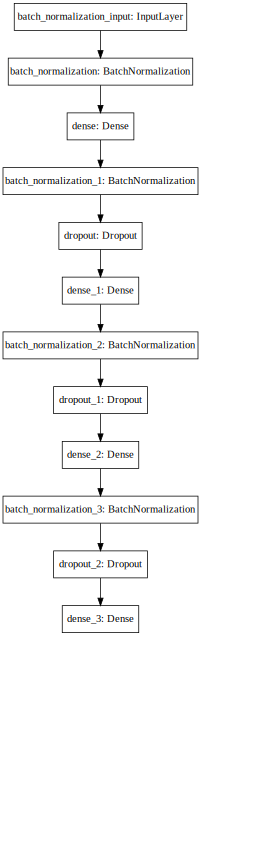

In [21]:
plot_model(model, to_file='illustration.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Compiling the model

In [22]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["binary_accuracy"]
)

# Adding earlystopping to stop raining when the accuracy is not improving

In [23]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 32,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [24]:
history = model.fit(
    
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    batch_size = 10,
    epochs = 30,
    callbacks = [early_stopping],
    verbose = 2
)

Epoch 1/30
488/488 - 1s - loss: 0.2475 - binary_accuracy: 0.8970 - val_loss: 0.0062 - val_binary_accuracy: 0.9991
Epoch 2/30
488/488 - 1s - loss: 0.0938 - binary_accuracy: 0.9678 - val_loss: 0.0026 - val_binary_accuracy: 0.9988
Epoch 3/30
488/488 - 1s - loss: 0.0660 - binary_accuracy: 0.9774 - val_loss: 8.4474e-04 - val_binary_accuracy: 1.0000
Epoch 4/30
488/488 - 1s - loss: 0.0468 - binary_accuracy: 0.9842 - val_loss: 2.3480e-04 - val_binary_accuracy: 1.0000
Epoch 5/30
488/488 - 1s - loss: 0.0478 - binary_accuracy: 0.9842 - val_loss: 1.7956e-04 - val_binary_accuracy: 1.0000
Epoch 6/30
488/488 - 1s - loss: 0.0426 - binary_accuracy: 0.9852 - val_loss: 1.0035e-04 - val_binary_accuracy: 1.0000
Epoch 7/30
488/488 - 1s - loss: 0.0330 - binary_accuracy: 0.9902 - val_loss: 4.7919e-05 - val_binary_accuracy: 1.0000
Epoch 8/30
488/488 - 1s - loss: 0.0252 - binary_accuracy: 0.9904 - val_loss: 2.9807e-05 - val_binary_accuracy: 1.0000
Epoch 9/30
488/488 - 1s - loss: 0.0298 - binary_accuracy: 0.9895

# Visualising loss and binary accuracy using a graph

In [25]:
history_df = pd.DataFrame(history.history)
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.247459,0.897004,0.006167,0.999077
1,0.093814,0.967788,0.002619,0.998769
2,0.065974,0.977431,0.000845,1.000000
3,0.046793,0.984202,0.000235,1.000000
4,0.047832,0.984202,0.000180,1.000000
5,0.042606,0.985228,0.000100,1.000000
6,0.032974,0.990152,0.000048,1.000000
7,0.025240,0.990357,0.000030,1.000000
8,0.029791,0.989536,0.000024,1.000000
9,0.019236,0.992819,0.000015,1.000000


In [26]:
epoch = [i for i in range(1, len(history_df) + 1)]

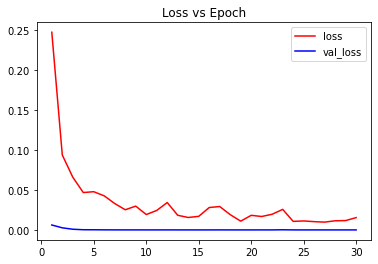

In [27]:
loss = history_df["loss"]
val_loss = history_df["val_loss"]

plt.plot(epoch, loss, 'r')
plt.plot(epoch, val_loss, 'b')
plt.title("Loss vs Epoch")

plt.legend(["loss", "val_loss"], loc ="upper right") 

plt.show()

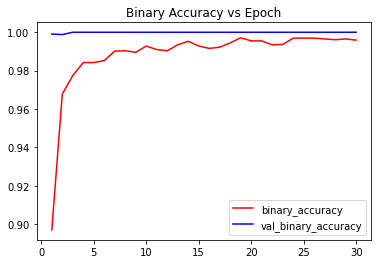

In [28]:
binary_accuracy = history_df["binary_accuracy"]
val_binary_accuracy = history_df["val_binary_accuracy"]

plt.plot(epoch, binary_accuracy, 'r')
plt.plot(epoch, val_binary_accuracy, 'b')
plt.title("Binary Accuracy vs Epoch")


plt.legend(["binary_accuracy", "val_binary_accuracy"], loc ="lower right") 

plt.show()

# *THE END*